# Exploring data analise

Сделайте для своих данных разведочный анализ данных, Exploratory Data Analysis (EDA). Выясните, какие в данных есть особенности, визуализируйте их. Ваша задача — откопать в данных интересные закономерности и построить для них красивые, понятные визуализации, на основе которых можно выдвинуть гипотезы и создать для датасета новые переменные.

Оценка за этот пункт зависит от сложности графиков и интересных идей, которые можно из них заметить.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Great_BD.tsv', delimiter = "\t")
data.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,OTG,Infrared,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,Very Good - Refurbished,“This iPhone 11 is in Very Good condition and ...,apple,iPhone 11,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,Very Good - Refurbished,“This Apple iPhone XR 64GB Factory Unlocked Sm...,apple,iPhone XR,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone 11,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone X,...,1.0,1,1.0,1,1,1.0,1,1,2023-06-14 00:00:00,0
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone X,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0


## Описание столбцов:

* `Title` - Название устройства
* `Price` - Цена устройства
* `Shipping_cost` - Стоимость доставки
* `Sales_Count` - Количество продаж
* `Sales_Value` - Выручка
* `Link` - Ссылка на устройство
* `Condition` - Состояние устройства
* `Seller Notes` - Заметки продавца
* `Brand` - Бренд
* `Model` - Модель
* `Storage Capacity` - Объём встроенной памяти
* `Network` - Сети
* `Camera Resolution` - Разрешение камеры
* `Screen Size` - Размер экрана
* `Lock Status` - Смартфон заблокирован оператором\смартфон разблокирован
* `RAM` - Объём оперативной памяти
* `Contract` - Контракт, что бы это не значило
* `Operating System` - Операционная система
* `Model Number` - Номер модели
* `Style` - Стиль (Смартфон, раскладушка и т.д.)
* `MPN` -
* `Connectivity` - Доступные протоколы подключения
* `Features` - Доступные функции
* `SIM Card Slot` - Слоты симкарт
* `Memory Card Type` - Поддержка карт памяти
* `Processor` - Процессор
* `Color` - Цвет
Следующие характеристики закодированы через One-Hot encoding (0-нет, 1 - есть). Их подробное описание не имеет смысла.
* `2G`
* `3G`
* `4G`
* `5G`
* `Bluetooth`
* `GSM`
* `WI-FI`
* `Micro USB`
* `USB`
* `Type-C`
* `Fast_usb`
* `NFC`
* `Dual-Band`
* `ANT+`
* `Android Beam`
* `Beidou`
* `Cellular`
* `FM`
* `DLNA`
* `EDGE`
* `Fast Charge`
* `GPS`
* `Galileo`
* `Global Version`
* `HDMI Micro`
* `Glonass`
* `Headphone Jack`
* `OTA`
* `OTG`
* `Infrared`
* `Lightning`
* `Quad-Band`
* `Tri-Band`
* `Wireless charging`
* `WAP`
* `WCDMA`
* `Last_Sale`

* `Is_Target` - 0 - сборная солянка, по которой обучалась модель. 1 - redmi и nokia на которых модель применялась. Флаг для сегрегации.

___

<ipython-input-4-03f279350514>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(brands))  # Генерируем цвета из цветовой карты
<ipython-input-4-03f279350514>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(brand_data['Price'], brand_data['Sales_Count'], c=colors(i), label=brand)


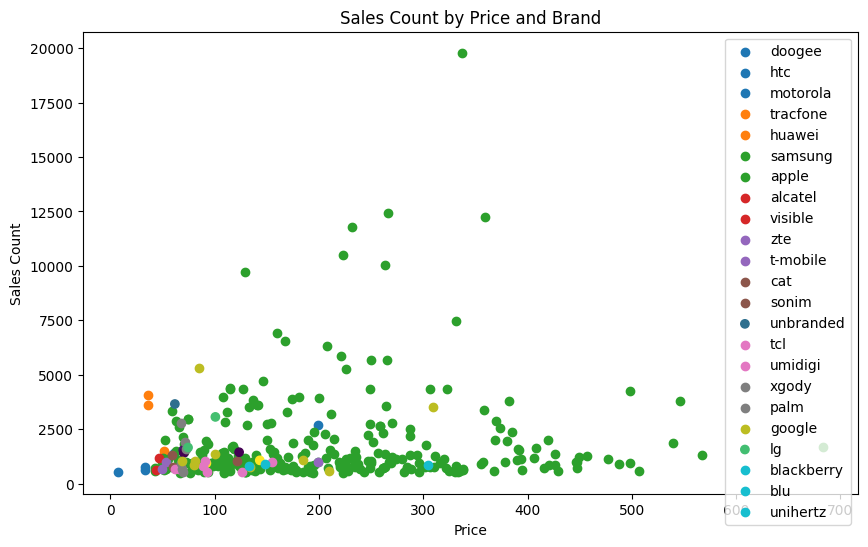

In [4]:
# make data:
PBS = data[data.Is_Target==0].groupby(by=["Price", "Brand"]).agg({"Sales_Count": sum})
PBS = PBS[PBS['Sales_Count']>500]
PBS.reset_index(inplace=True)

# Создаем график рассеяния с разными цветами и размером
plt.figure(figsize=(10, 6))

brands = PBS['Brand'].unique()
colors = plt.cm.get_cmap('tab10', len(brands))  # Генерируем цвета из цветовой карты

for i, brand in enumerate(brands):
    brand_data = PBS[PBS['Brand'] == brand]
    plt.scatter(brand_data['Price'], brand_data['Sales_Count'], c=colors(i), label=brand)

plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.title('Sales Count by Price and Brand')
plt.legend()
plt.show()

Здесь мы наблюдаем график рассеяния описанный ценой и количеством продаж. Цветами выделены группы брендов. Самый большой разброс у Samsung и Apple,
глаыной закономерности здесь не прослеживается. Остальные группы брендов сосредоточены в количестве продаж около 5000.
Явной зависимости между продажами и ценой не наблюдается.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


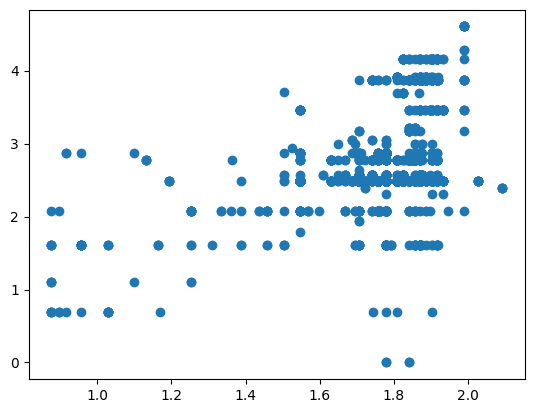

In [5]:
plt.scatter(np.log(data["Screen Size"][data.Is_Target==0]), np.log(data["Camera Resolution"][data.Is_Target==0]))
plt.show()

Проводя анализ корреляции различных показателей, мы обнаружили необычную взаимосвязь: коэффициент корреляции между Screen Size и Camera Resolution составляет 0.51. Мы решили рассмотреть эту корреляцию детальнее, изобразив логарифмы двух параметров на графике рассеяния. В целом, здесь можно заметить положительную линейную зависимость, однако достаточно много данных сконцентрированы в одной области, что говорит о том, что именно в таком сочетании эти характеристики встречаются чаще всего. Идейно это так же легко объяснить: чем современнее и технологичнее телефон, тем лучше там камера, и одновременно чем он более современный, тем меньше у него рамки экрана и тем больше сам экран (но естественно, у всего есть своя мера). Данная взаимосвязь имеет вид: из А следует В и из А следует С, а В и С визуально тоже связаны, но друг друга не порождают

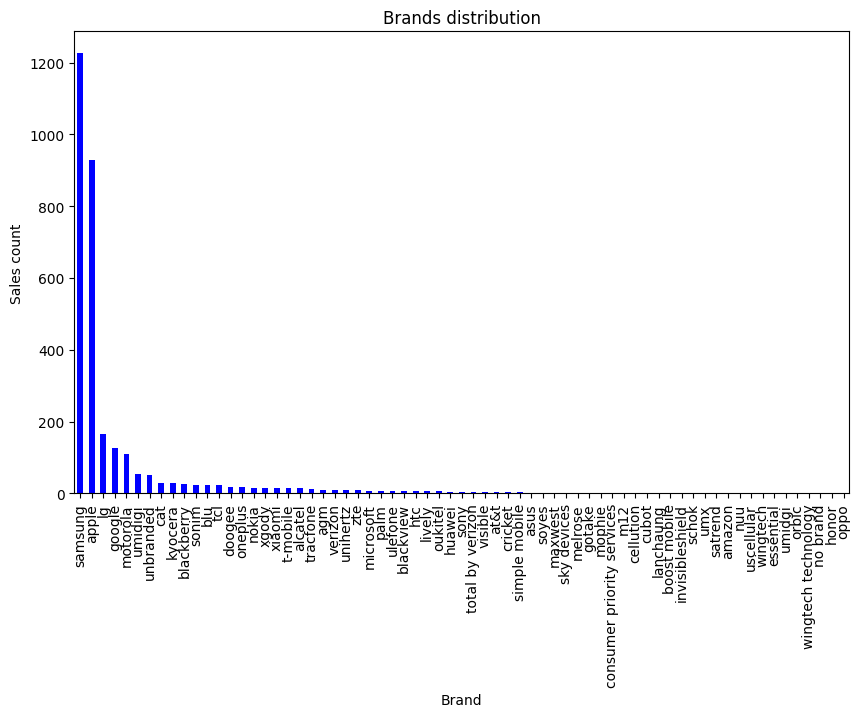

In [6]:
# Гистограмма распределения брендов
brands = data.Brand[data.Is_Target==0].value_counts()
plt.figure(figsize=(10,6))
brands.plot(kind='bar', color='b')
plt.title('Brands distribution')
plt.xlabel('Brand')
plt.ylabel('Sales count')
plt.show()

Рассматриваем распределение брендов по количеству продаж. Явно видно 2 лидера - samsung, apple (кажется, что это очевидно и без статистических данных, так как это самые популярные бренды смартфонов в мире, которые присутствуют в продаже в большинстве стран и сотрудничают с множенством международных конференций и брендов, соответсвенно поэтому получается большие продажи на ebay). Это 2 лидера трендсеттера, которые не могут обойтись друг без друга в гонке за покупателей и новые технологии. Далее в группу наиболее популярных брендов по продажам можно объеденить lg, google, motorola, umigidi, unbranded. И далее идут остальные бренды смартфонов.

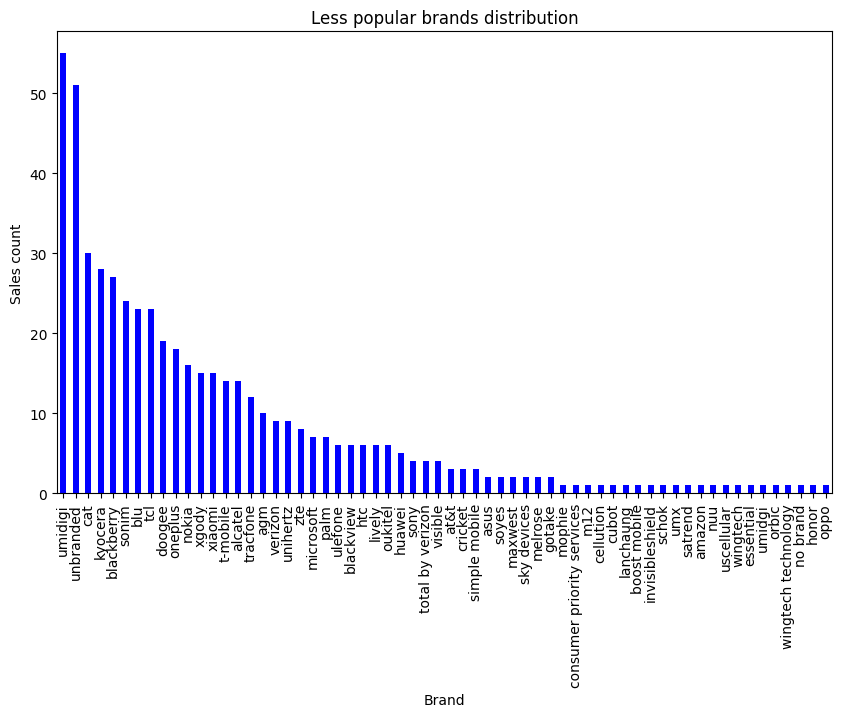

In [7]:
plt.figure(figsize=(10,6))
brands[brands<100].plot(kind='bar', color='b')
plt.title('Less popular brands distribution')
plt.xlabel('Brand')
plt.ylabel('Sales count')
plt.show()

Здесь мы представили распеределение менее популярных брендов, чем первые пять лидеров, так как на общей гистограмме довольно сложно увидеть их распределение из-за слишком большой разницы по продажам с лидерами. Опять же здесь мы можем выделить 2 явных лидера umidigi, unbranded.

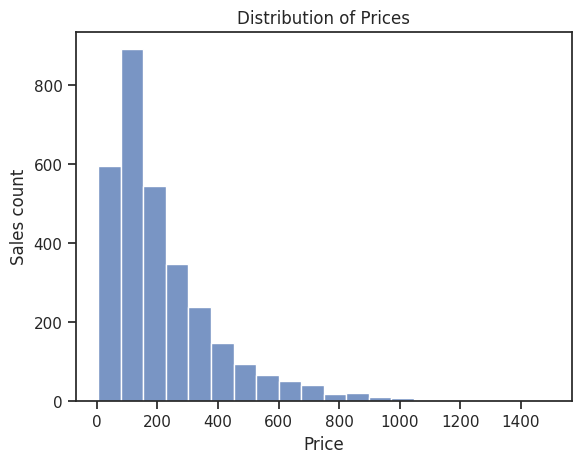

In [16]:
# Гистограмма распределения цен
sns.histplot(data[data.Is_Target==0]['Price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Sales count')
plt.show()

Далее мы рассматриваем выборку из независимых случайных величин, таких как цены смартфонов. Естественно, стоимость начинается с 0 ("покупаю за бесплатно!"). Цена представлена в долларах за один гаджет.
Визуально распределение цен напомнило нам логнормальное распределение, поэтому далее мы захотели проверить нашу гипотезу.


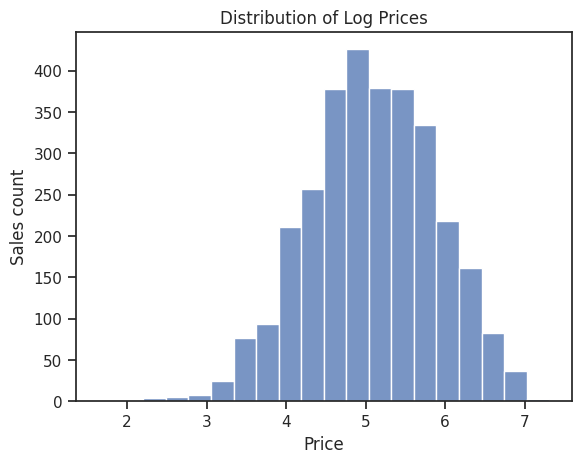

In [17]:
# Гистограмма распределения логарифма цен
sns.histplot(np.log(data[data.Is_Target==0]['Price']), bins=20)
plt.title('Distribution of Log Prices')
plt.xlabel('Price')
plt.ylabel('Sales count')
plt.show()

На гистограмме изображено распределение логарифма цен, и вот оно как раз совсем напоминает нормальное (визуально с мат.ожиданием 5 и стандартным отклонением 0,5). Мы проверили нашу гипотезу о том, что распределение логарифма цен является нормальным с помощью двух тестов: тест Шапиро-Уилка и тест Колмогорова-Смирнова.
Статистика теста Шапиро-Уилка составила 0.996, а Р-value - 1.03e-06, из чего мы делаем вывод, что гипотеза Н0 о том, что логарифмы цен на смартфоны имеет нормальное распределение не отвергается.
Статистика теста Колмогорова-Смирнова составила 0.9996, а P-value ~ 0, что точно так же говорит нам о том, что гипотеза Н0 не отвергается.

Итого, проведя два теста, мы не можем отвергнуть гипотезу о том, что логарифмы цен имеют нормальное распределение, а значит, не можем отвергнуть гипотезу о логнормальном распределении цен на смартфоны.

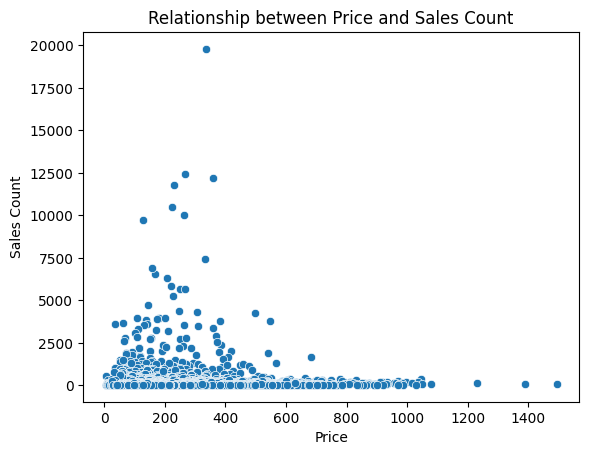

In [10]:
# Диаграмма рассеяния количества продаж и стоимости товаров
sns.scatterplot(x='Price', y='Sales_Count', data=data[data.Is_Target==0])
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

Далее мы построили диаграмму рассеяния количества продаж и стоимости товаров, чтобы, может быть, заметить между ними какую-нибудь взаимосвязь. Гипотеза состояла в том, что взаимосвязь между ценой и объемом продаж имеет вид параболы: очень дешевые смартфоны покупают в небольшом количестве (по разным причинам -  например, из-за недоверия к компании и цене товара, или ожидании, что смартфон быстро сломается. А может быть и из-за недостаточного количества фичей - качественный социологический анализ мы не проводили), при очень большой цене не все готовы потратиться на смартфон, так как, согласно законам спроса, при высокой цене наблюдается низкая величина спроса. Средний же ценовой сегмент пользуется наибольшей популярностью, а значит и продажи там так же будут велики. Изобразив диаграмму рассеяния, мы поняли, что в выборке существует много выбросов, а основная масса заказов сгруппированны так, что на данном графике не разобрать.


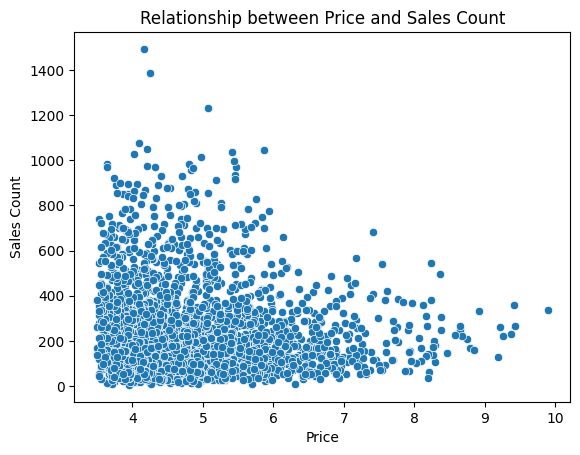

In [11]:
Price_Sales = data[data.Is_Target==0][["Price", "Sales_Count"]]
Price_Sales["Sales_Count_log"] = Price_Sales.Sales_Count.apply(lambda x: np.log(x))
sns.scatterplot(x='Sales_Count_log', y= 'Price', data=Price_Sales)
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

Поэтому мы рассмотрели логарифмы вышеуказанных величин. Здесь ситуация не сильно улучшилась, так как мы просто наблюдаем облако всевозможных наблюдений, изучить детальнее которые больше не представляется возможным. Итог: гипотеза о виде взаимосвязи не подтвердилась, мы наблюдаем большие продажи и по низкой цене, и средней, и по высокой, как и низкие продажи.

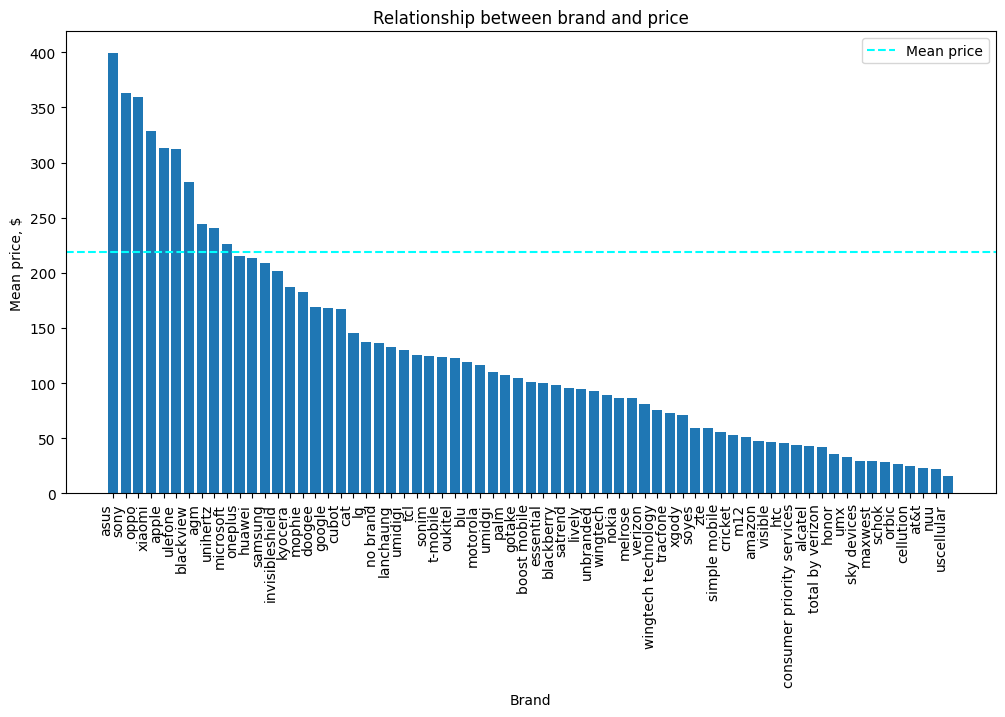

In [12]:
# Диаграмма распределения брендов и  средних цен
brand_prices = data[data.Is_Target==0].groupby('Brand').agg({'Price': 'mean'}).sort_values(by='Price', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(brand_prices.index, brand_prices['Price'])
plt.axhline(y=data[data.Is_Target==0].Price.mean(), c="cyan", linestyle='--', label='Mean price')
ax.set_xlabel('Brand')
ax.set_ylabel('Mean price, $')
ax.set_title('Relationship between brand and price')

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

Теперь мы решили рассмотреть диаграмма распределения брендов и  средних цен, чтобы посмотреть на их соотношение. Оказалось, что самый дорогой бренд по средней цене - Asus. Казалось бы, что Asus должен относится к средней ценовой категории (так как он на слуху, как смартфон средней ценовой категории у людей), однако Asus в последнее время нацелен на игровые телефоны из-за этого цена стала такой после появления дополнительных характеристик и фичей.

Вот некоторые характеристики Asus:

Asus ROG Phone 5:
- Дисплей: 6,78 дюймов AMOLED с разрешением 2448 x 1080 пикселей и частотой обновления 144 Гц
- Процессор: Qualcomm Snapdragon 888
- Оперативная память: 8/12/16 ГБ
- Встроенная память: 128/256 ГБ
- Камера: основная - тройная, 64 МП + 13 МП + 5 МП; фронтальная - 24 МП
- Батарея: 6000 мАч
- ОС: Android 11

Asus ROG Phone 3:
- Дисплей: 6,59 дюймов AMOLED с разрешением 2340 x 1080 пикселей и частотой обновления 144 Гц
- Процессор: Qualcomm Snapdragon 865+
- Оперативная память: 8/12/16 ГБ
- Встроенная память: 128/256/512 ГБ
- Камера: основная - тройная, 64 МП + 13 МП + 5 МП; фронтальная - 24 МП
- Батарея: 6000 мАч
- ОС: Android 10

Asus ROG Phone II:
- Дисплей: 6,59 дюймов AMOLED с разрешением 2340 x 1080 пикселей и частотой обновления 120 Гц
- Процессор: Qualcomm Snapdragon 855+
- Оперативная память: 8/12 ГБ
- Встроенная память: 128/512 ГБ
- Камера: основная - двойная, 48 МП + 13 МП; фронтальная - 24 МП
- Батарея: 6000 мАч
- ОС: Android 9.0

Это только некоторые характеристики игровых телефонов Asus, их полный список можно найти на официальном сайте производителя. Однако точно можно отиметить характеристики батареи в виде 6000 мАч, что и отличает игровую модель и высокую ценовую политику.

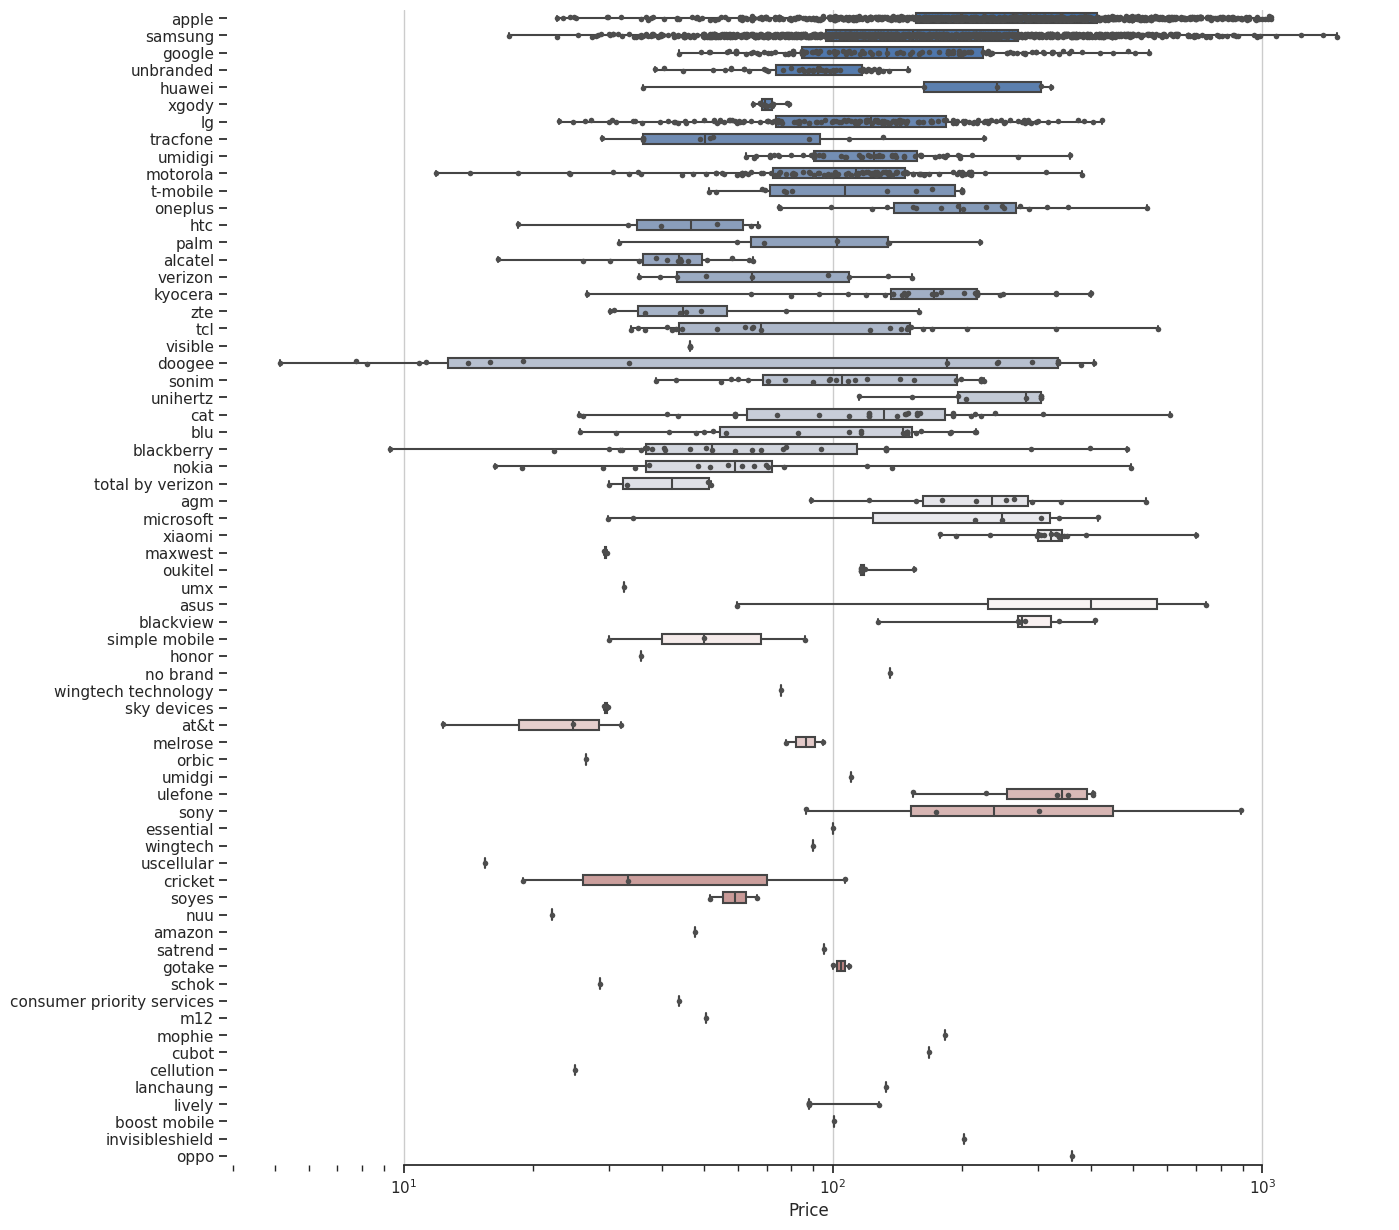

In [13]:
#Графики с усами для распределения цен по брендам
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
sns.boxplot(x="Price", y="Brand", data=data[data.Is_Target==0],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="Price", y="Brand", data=data[data.Is_Target==0],
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-14-bbfa7714c61e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data[data.Is_Target==0].corr()


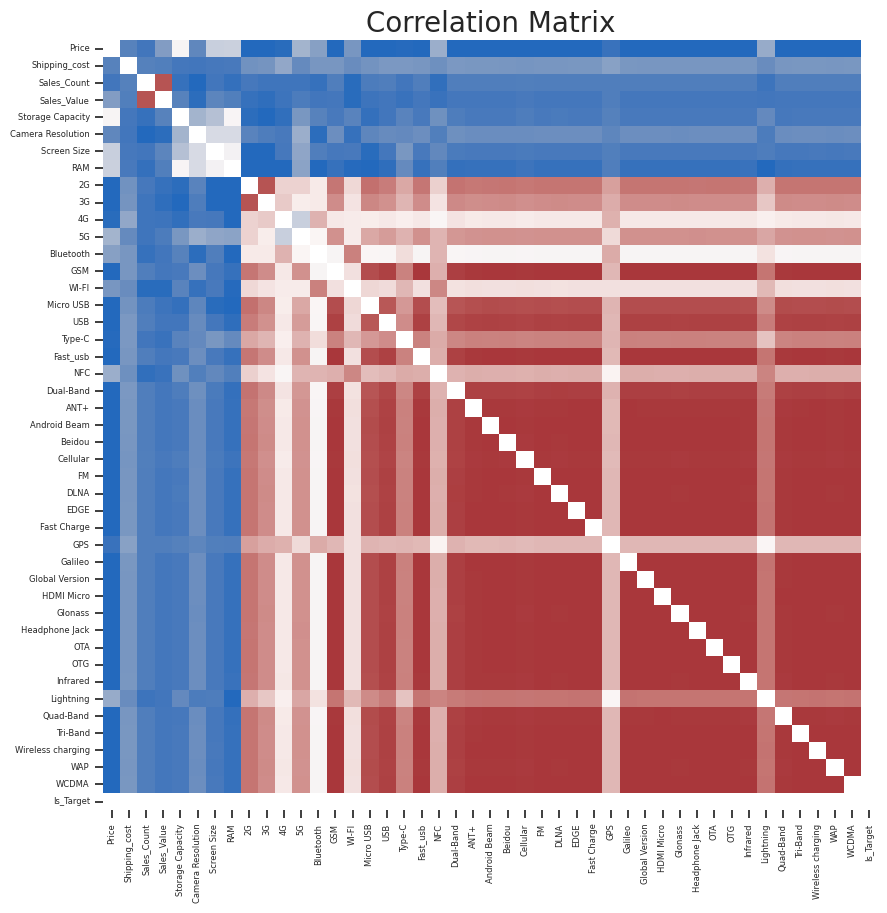

In [14]:
#Посмотрим-ка на корреляционную матрицу
cor = data[data.Is_Target==0].corr()
np.fill_diagonal(cor.values, np.nan)
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

<ipython-input-15-a28a858ae289>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data[data.Is_Target==0].corr()


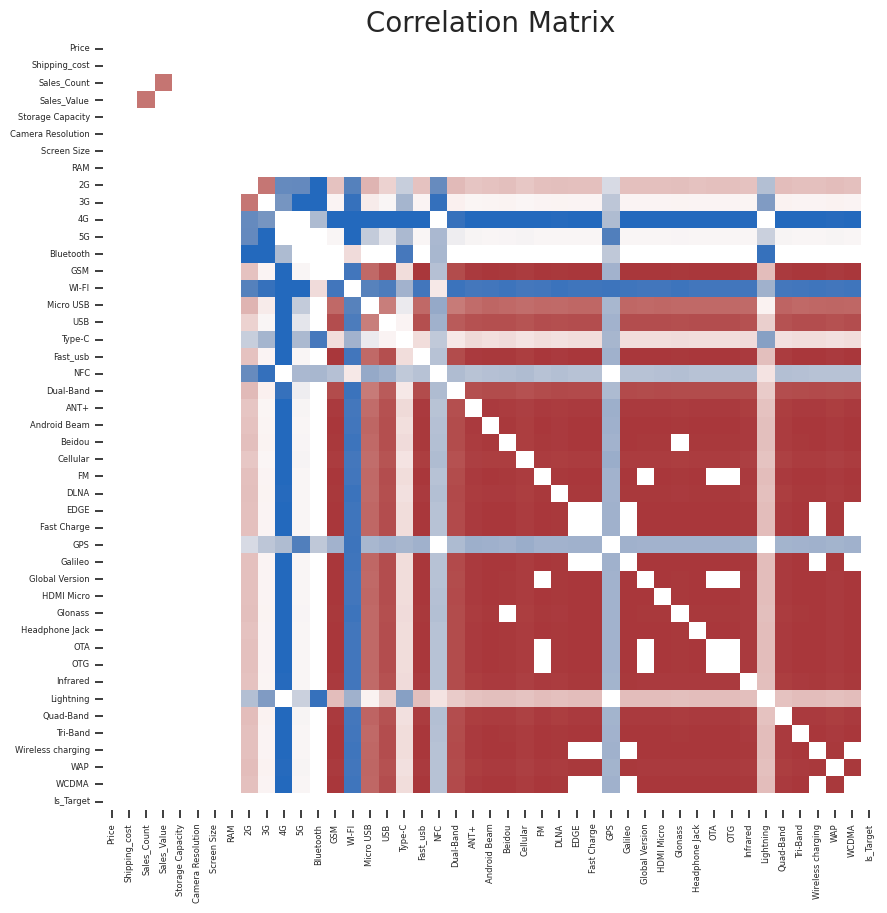

In [15]:
#Посмотрим-ка на корреляционную матрицу
cor = data[data.Is_Target==0].corr()
cor = cor[(0.5<np.abs(cor)) & (np.abs(cor)<1)]
np.fill_diagonal(cor.values, np.nan)
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()